# ハンズオン

In [49]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [50]:
def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

In [51]:
# 中間層の活性化関数
## シグモイド関数（ロジスティック関数）
def sigmoid(x):
    return 1/(1 + np.exp(-x))

## ReLU関数
def relu(x):
    return np.maximum(0, x)

# 誤差関数
## 平均二乗誤差
def mean_squared_error(d, y):
    return np.mean(np.square(d - y)) / 2

# 活性化関数の導関数
## シグモイド関数（ロジスティック関数）の導関数
def d_sigmoid(x):
    dx = (1.0 - sigmoid(x)) * sigmoid(x)
    return dx


# ReLU関数の導関数
def d_relu(x):
    return np.where( x > 0, 1, 0)
    
    
# 平均二乗誤差の導関数
def d_mean_squared_error(d, y):
    if type(d) == np.ndarray:
        batch_size = d.shape[0]
        dx = (y - d)/batch_size
    else:
        dx = y - d
    return dx

In [52]:
def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    print("#### 初期設定 ####")
    print_vec("重み1", network['W1'])
    print_vec("重み2", network['W2'])
    print_vec("バイアス1", network['b1'])
    print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = relu(u1)
    
    ## 試してみよう
    #z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2
    
    print("#### 順伝播 ####")
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    print("#### 誤差逆伝播 ####")
    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad

In [53]:
# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

In [54]:
for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])

In [55]:
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

#### 初期設定 ####
*** 重み1 ***
[[ 0.05724672 -1.52726737  1.12642693 -1.90588014  1.21738815  1.44501053
   2.00725116  0.16881455 -0.80421478  1.01683128]
 [-0.78513417 -1.58285514 -1.80300253  0.21971099  0.02455692  0.36171108
  -1.10067023  0.3427878   0.43405799  0.80353334]]

*** 重み2 ***
[ 1.11212834 -0.65299493  2.67012009 -2.33638159 -0.41295802 -2.10610443
  0.71168036  0.55596121 -0.56328035 -0.58235165]

*** バイアス1 ***
[-1.38379997 -0.43405655  1.05123615  0.21917012 -0.36181215  0.06928142
 -0.27090463  1.26009673 -1.60501716 -1.72390348]

*** バイアス2 ***
1.9008964963881796



In [56]:
# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = mean_squared_error(d, y)
    losses.append(loss)


#### 順伝播 ####
*** 総入力1 ***
[-1.40648374 -1.50276351  1.61875702 -0.95138991  0.39813915  0.99603419
  0.89733034  1.39069428 -2.07359104 -1.03097212]

*** 中間層出力1 ***
[0.         0.         1.61875702 0.         0.39813915 0.99603419
 0.89733034 1.39069428 0.         0.        ]

*** 総入力2 ***
5.372789828562371

*** 出力1 ***
5.372789828562371

出力合計: 5.372789828562371
#### 誤差逆伝播 ####
*** 偏微分_重み1 ***
[[ 0.58106249 -0.34117542  0.77023427 -1.22070776 -0.20743202 -0.86698637
   0.3059947   0.18541486 -0.29430154 -0.30426587]
 [ 0.0693248  -0.0407046   0.09189431 -0.14563893 -0.02474808 -0.10343751
   0.0365073   0.02212128 -0.03511222 -0.03630104]]

*** 偏微分_重み2 ***
[0.         0.         5.43246368 0.         1.33613411 3.34263852
 3.01139357 4.6670971  0.         0.        ]

*** 偏微分_バイアス1 ***
[ 0.9330611  -0.54785419  1.2368302  -1.96019353 -0.33309111 -1.39219323
  0.49136153  0.2977363  -0.47258483 -0.4885854 ]

*** 偏微分_バイアス2 ***
3.3559475710699394

#### 順伝播 ####
*** 総入力1 ***
[-1.87564525

   0.02366219  0.03028832 -0.03440048 -0.03507517]]

*** 偏微分_重み2 ***
[0.         0.         1.0627442  0.         0.         0.54304813
 0.         1.19551263 0.         0.        ]

*** 偏微分_バイアス1 ***
[ 0.29398054 -0.17261299  0.0283829  -0.60841244  0.14044476 -0.12041623
  0.10241856  0.13109888 -0.1488978  -0.15181809]

*** 偏微分_バイアス2 ***
1.0573619127344824

#### 順伝播 ####
*** 総入力1 ***
[-1.72192298 -2.70554097  0.24910249 -1.02282105 -0.06680982  0.75328891
 -0.63451026  1.46856123 -1.65503629 -0.81970173]

*** 中間層出力1 ***
[0.         0.         0.24910249 0.         0.         0.75328891
 0.         1.46856123 0.         0.        ]

*** 総入力2 ***
1.7615566713019617

*** 出力1 ***
1.7615566713019617

出力合計: 1.7615566713019617
#### 誤差逆伝播 ####
*** 偏微分_重み1 ***
[[-0.10710071  0.06288503 -0.00592257  0.2216521  -0.05116575  0.04395144
  -0.03731234 -0.03448101  0.05424529  0.05530919]
 [-0.3129736   0.18376492 -0.01730714  0.64771986 -0.14951841  0.12843649
  -0.10903547 -0.10076167  0.1585175


*** 偏微分_重み2 ***
[0.         0.         0.10583784 0.         0.         0.06710427
 0.         0.11846545 0.         0.        ]

*** 偏微分_バイアス1 ***
[ 0.02948973 -0.01731513 -0.00731541 -0.06406994  0.02652285  0.00470194
  0.01546468  0.01491799 -0.01493621 -0.01522915]

*** 偏微分_バイアス2 ***
0.10606593353630922

#### 順伝播 ####
*** 総入力1 ***
[-1.55139917 -1.37478225  0.94023231 -0.32305885 -0.21057208  0.57145591
 -0.24524227  1.10473887 -1.68796707 -1.26008592]

*** 中間層出力1 ***
[0.         0.         0.94023231 0.         0.         0.57145591
 0.         1.10473887 0.         0.        ]

*** 総入力2 ***
1.6006395569402792

*** 出力1 ***
1.6006395569402792

出力合計: 1.6006395569402792
#### 誤差逆伝播 ####
*** 偏微分_重み1 ***
[[ 0.01462103 -0.00858485 -0.00380091 -0.03176592  0.01315004  0.00231632
   0.0076674   0.00736037 -0.00740539 -0.00755062]
 [ 0.02130132 -0.01250724 -0.00553753 -0.04627965  0.01915825  0.00337464
   0.0111706   0.0107233  -0.01078888 -0.01100048]]

*** 偏微分_重み2 ***
[0.         0.    

[-1.40704519 -2.31027467  0.76994633 -1.36069926  0.1087277   0.79608574
 -0.06178421  1.26698181 -1.89474146 -1.02914854]

*** 中間層出力1 ***
[0.         0.         0.76994633 0.         0.1087277  0.79608574
 0.         1.26698181 0.         0.        ]

*** 総入力2 ***
2.1488734420309825

*** 出力1 ***
2.1488734420309825

出力合計: 2.1488734420309825
#### 誤差逆伝播 ####
*** 偏微分_重み1 ***
[[-0.03991706  0.02343762  0.02022902  0.08781479 -0.04587461 -0.01691878
  -0.02205728 -0.02296324  0.02021754  0.02061406]
 [-0.05913125  0.03471938  0.02996632  0.13008469 -0.06795649 -0.02506269
  -0.03267461 -0.03401666  0.02994931  0.03053669]]

*** 偏微分_重み2 ***
[ 0.          0.         -0.26445897  0.         -0.03734548 -0.27343726
  0.         -0.43517931  0.          0.        ]

*** 偏微分_バイアス1 ***
[-0.09549767  0.05607221  0.04839597  0.21008832 -0.10975053 -0.04047654
 -0.05276988 -0.05493731  0.04836848  0.04931712]

*** 偏微分_バイアス2 ***
-0.3434771549134399

#### 順伝播 ####
*** 総入力1 ***
[-1.37095892 -1.84579528 

  0.4979497   1.42657943 -2.24549096 -0.76336186]

*** 中間層出力1 ***
[0.         0.         0.89438159 0.         0.6193616  1.21012903
 0.4979497  1.42657943 0.         0.        ]

*** 総入力2 ***
3.658911486183776

*** 出力1 ***
3.658911486183776

出力合計: 3.658911486183776
#### 誤差逆伝播 ####
*** 偏微分_重み1 ***
[[-0.01848557  0.01085395  0.01088601  0.04026392 -0.02158191 -0.00865548
  -0.00859245 -0.01075069  0.00936273  0.00954636]
 [-0.0201394   0.01182501  0.01185994  0.04386618 -0.02351276 -0.00942986
  -0.00936119 -0.01171251  0.01020038  0.01040043]]

*** 偏微分_重み2 ***
[ 0.          0.         -0.08210825  0.         -0.05686018 -0.11109528
 -0.04571402 -0.1309664   0.          0.        ]

*** 偏微分_バイアス1 ***
[-0.0255246   0.01498697  0.01503124  0.05559582 -0.02979998 -0.01195136
 -0.01186433 -0.01484439  0.01292792  0.01318147]

*** 偏微分_バイアス2 ***
-0.09180449483937858

#### 順伝播 ####
*** 総入力1 ***
[-1.46283843 -2.22204863  0.32403693 -1.06656336 -0.0853635   0.54289493
 -0.52775742  1.28205874 -1

1.0585919738594736

*** 出力1 ***
1.0585919738594736

出力合計: 1.0585919738594736
#### 誤差逆伝播 ####
*** 偏微分_重み1 ***
[[ 0.00631142 -0.0037058  -0.00360986 -0.01367207  0.00836549  0.00455836
   0.00285531  0.00442962 -0.00319666 -0.00325936]
 [ 0.00784468 -0.00460607 -0.00448682 -0.01699348  0.01039775  0.00566574
   0.00354897  0.00550572 -0.00397324 -0.00405117]]

*** 偏微分_重み2 ***
[0.         0.         0.13564693 0.00624906 0.         0.05703122
 0.         0.12645707 0.         0.        ]

*** 偏微分_バイアス1 ***
[ 0.0374801  -0.02200674 -0.02143699 -0.08119097  0.04967808  0.02706962
  0.01695616  0.02630507 -0.01898325 -0.01935556]

*** 偏微分_バイアス2 ***
0.13480495380150948

#### 順伝播 ####
*** 総入力1 ***
[-1.65615461 -1.05913989  0.60713245  0.22624977 -0.51845209  0.23131716
 -0.69035677  0.99002829 -1.4766297  -1.40876814]

*** 中間層出力1 ***
[0.         0.         0.60713245 0.22624977 0.         0.23131716
 0.         0.99002829 0.         0.        ]

*** 総入力2 ***
0.8128628553640641

*** 出力1 ***
0.8


出力合計: 2.5084129425016095
#### 誤差逆伝播 ####
*** 偏微分_重み1 ***
[[-0.02733803  0.01605174  0.01858046  0.05851914 -0.03668252 -0.01972138
  -0.01136108 -0.01641612  0.0138464   0.01411797]
 [-0.04834694  0.02838729  0.0328593   0.10349033 -0.06487254 -0.034877
  -0.02009192 -0.0290317   0.02448717  0.02496743]]

*** 偏微分_重み2 ***
[ 0.          0.         -0.13052413  0.         -0.03975998 -0.18002581
  0.         -0.30433801  0.          0.        ]

*** 偏微分_バイアス1 ***
[-0.06515623  0.038257    0.04428384  0.13947191 -0.08742747 -0.04700306
 -0.02707749 -0.03912545  0.03300089  0.03364813]

*** 偏微分_バイアス2 ***
-0.23434788957687092

#### 順伝播 ####
*** 総入力1 ***
[-1.01471616 -3.48754949  1.34247195 -3.25618822  0.965467    1.53200455
  1.13679399  1.40478735 -2.5173131  -0.6325139 ]

*** 中間層出力1 ***
[0.         0.         1.34247195 0.         0.965467   1.53200455
 1.13679399 1.40478735 0.         0.        ]

*** 総入力2 ***
4.482463493902925

*** 出力1 ***
4.482463493902925

出力合計: 4.482463493902925
###

 1.24652956 1.10879596 0.         0.        ]

*** 総入力2 ***
3.1829713732932046

*** 出力1 ***
3.1829713732932046

出力合計: 3.1829713732932046
#### 誤差逆伝播 ####
*** 偏微分_重み1 ***
[[ 0.04366039 -0.02563554 -0.01415141 -0.08832085  0.05261348  0.02395386
   0.0100451   0.02945101 -0.02211349 -0.0225472 ]
 [ 0.01134087 -0.00665888 -0.00367586 -0.02294152  0.01366646  0.00622206
   0.00260923  0.00764996 -0.00574402 -0.00585668]]

*** 偏微分_重み2 ***
[0.         0.         0.34061489 0.         0.12298745 0.25272515
 0.22974665 0.2043611  0.         0.        ]

*** 偏微分_バイアス1 ***
[ 0.05124382 -0.03008821 -0.01660938 -0.10366141  0.06175199  0.02811444
  0.01178984  0.0345664  -0.02595441 -0.02646345]

*** 偏微分_バイアス2 ***
0.18430902272739225

#### 順伝播 ####
*** 総入力1 ***
[-1.46578311 -1.95469483  0.64344315 -0.90092827 -0.07224025  0.58365835
 -0.26605258  1.15668146 -1.76506601 -1.1607374 ]

*** 中間層出力1 ***
[0.         0.         0.64344315 0.         0.         0.58365835
 0.         1.15668146 0.         0

  0.88252567  0.96759682 -2.13481223 -1.07462046]

*** 中間層出力1 ***
[0.         0.         1.77367261 0.         0.30810526 1.07103229
 0.88252567 0.96759682 0.         0.        ]

*** 総入力2 ***
2.0144246008186864

*** 出力1 ***
2.0144246008186864

出力合計: 2.0144246008186864
#### 誤差逆伝播 ####
*** 偏微分_重み1 ***
[[-0.00622697  0.00365621  0.00203257  0.01211274 -0.00788808 -0.00398258
  -0.00102285 -0.00436539  0.00315389  0.00321574]
 [-0.00073876  0.00043377  0.00024114  0.00143703 -0.00093583 -0.00047249
  -0.00012135 -0.0005179   0.00037417  0.00038151]]

*** 偏微分_重み2 ***
[ 0.          0.         -0.06273706  0.         -0.01089808 -0.03788378
 -0.03121606 -0.03422513  0.          0.        ]

*** 偏微分_バイアス1 ***
[-0.00983435  0.00577432  0.00321007  0.01912985 -0.01245778 -0.00628975
 -0.00161541 -0.00689433  0.00498099  0.00507868]

*** 偏微分_バイアス2 ***
-0.035371273525901525

#### 順伝播 ####
*** 総入力1 ***
[-1.18807943 -2.1320668   1.79588224 -1.86402063  0.57535774  1.2888192
  1.13271411  1.07528689

 0.         1.18108832 0.         0.        ]

*** 総入力2 ***
2.011657604237183

*** 出力1 ***
2.011657604237183

出力合計: 2.011657604237183
#### 誤差逆伝播 ####
*** 偏微分_重み1 ***
[[ 0.00202555 -0.00118932 -0.00124578 -0.00386548  0.00274255  0.00188545
   0.00038213  0.00127574 -0.00102592 -0.00104604]
 [ 0.09653922 -0.05668376 -0.05937479 -0.18423152  0.13071185  0.08986183
   0.01821244  0.06080272 -0.04889602 -0.049855  ]]

*** 偏微分_重み2 ***
[0.         0.         0.01416469 0.         0.         0.08525925
 0.         0.54605466 0.         0.        ]

*** 偏微分_バイアス1 ***
[ 0.12854307 -0.07547508 -0.07905821 -0.24530636  0.17404432  0.11965204
  0.02425007  0.08095951 -0.0651056  -0.0663825 ]

*** 偏微分_バイアス2 ***
0.46233177350282517

#### 順伝播 ####
*** 総入力1 ***
[-1.39975134 -1.33263741  1.57771359 -0.72176959  0.0841517   0.8522228
  0.55346536  0.92600208 -1.97258282 -1.17026553]

*** 中間層出力1 ***
[0.         0.         1.57771359 0.         0.0841517  0.8522228
 0.55346536 0.92600208 0.         0.    

  -7.13288571e-04 -7.27278091e-04]]

*** 偏微分_重み2 ***
[0.         0.         0.10540417 0.         0.03681345 0.07389799
 0.07411531 0.05342494 0.         0.        ]

*** 偏微分_バイアス1 ***
[ 0.01431959 -0.00840786 -0.00378662 -0.02671375  0.01680858  0.00833337
  0.0007941   0.00981388 -0.00725271 -0.00739495]

*** 偏微分_バイアス2 ***
0.05150335909165271

#### 順伝播 ####
*** 総入力1 ***
[-1.4294019  -1.74876641  1.00190122 -0.87401652  0.01914625  0.70280381
  0.0789652   1.06341692 -1.86002024 -1.15537895]

*** 中間層出力1 ***
[0.         0.         1.00190122 0.         0.01914625 0.70280381
 0.0789652  1.06341692 0.         0.        ]

*** 総入力2 ***
1.7586519990735823

*** 出力1 ***
1.7586519990735823

出力合計: 1.7586519990735823
#### 誤差逆伝播 ####
*** 偏微分_重み1 ***
[[-0.0139748   0.00820541  0.00723802  0.02607053 -0.01855572 -0.01153826
  -0.00118336 -0.00942203  0.00707807  0.0072169 ]
 [-0.01414099  0.00830299  0.0073241   0.02638057 -0.0187764  -0.01167548
  -0.00119743 -0.00953409  0.00716225  0.00730272]]

##### 結果表示 #####


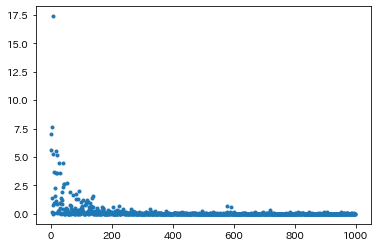

In [57]:

print("##### 結果表示 #####")    
lists = range(epoch)

plt.plot(lists, losses, '.')
# グラフの表示
plt.show()